##### Copyright 2020 The TensorFlow Hub Authors.

Licensed under the Apache License, Version 2.0 (the "License");

In [1]:
#@title Copyright 2020 The TensorFlow Hub Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

<table class="tfo-notebook-buttons" align="left">
  <td><a target="_blank" href="https://tensorflow.google.cn/hub/tutorials/spice"><img src="https://tensorflow.google.cn/images/tf_logo_32px.png">View 在 TensorFlow.org 上查看</a></td>
  <td><a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/zh-cn/hub/tutorials/spice.ipynb"><img src="https://tensorflow.google.cn/images/colab_logo_32px.png">在 Google Colab 中运行 </a></td>
  <td><a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/zh-cn/hub/tutorials/spice.ipynb">     <img src="https://tensorflow.google.cn/images/GitHub-Mark-32px.png">     在 GitHub 上查看源代码</a></td>
  <td><a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/zh-cn/hub/tutorials/spice.ipynb"><img src="https://tensorflow.google.cn/images/download_logo_32px.png">下载笔记本</a></td>
  <td>     <a href="https://tfhub.dev/google/spice/2"><img src="https://tensorflow.google.cn/images/hub_logo_32px.png">看到 TF Hub models</a> </td>
</table>

# 使用 SPICE 进行音高检测

此 Colab 将为您展示如何使用从 TensorFlow Hub 下载的 SPICE 模型。

In [2]:
!sudo apt-get install -q -y timidity libsndfile1

Reading package lists...
Building dependency tree...


Reading state information...


libsndfile1 is already the newest version (1.0.28-7ubuntu0.1).


The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libparted-fs-resize0
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  fluid-soundfont-gm libao-common libao4
Suggested packages:
  fluid-soundfont-gs fluidsynth libaudio2 libsndio6.1 freepats pmidi
  timidity-daemon


The following NEW packages will be installed:
  fluid-soundfont-gm libao-common libao4 timidity


0 upgraded, 4 newly installed, 0 to remove and 170 not upgraded.


Need to get 120 MB of archives.
After this operation, 150 MB of additional disk space will be used.
Get:1 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 fluid-soundfont-gm all 3.1-5.1 [119 MB]


Get:2 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libao-common all 1.2.2+20180113-1ubuntu1 [6644 B]
Get:3 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libao4 amd64 1.2.2+20180113-1ubuntu1 [35.1 kB]


Get:4 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 timidity amd64 2.14.0-8build1 [613 kB]
Fetched 120 MB in 3s (34.9 MB/s)


Selecting previously unselected package fluid-soundfont-gm.


(Reading database ... 140644 files and directories currently installed.)
Preparing to unpack .../fluid-soundfont-gm_3.1-5.1_all.deb ...
Unpacking fluid-soundfont-gm (3.1-5.1) ...


Selecting previously unselected package libao-common.
Preparing to unpack .../libao-common_1.2.2+20180113-1ubuntu1_all.deb ...
Unpacking libao-common (1.2.2+20180113-1ubuntu1) ...


Selecting previously unselected package libao4:amd64.
Preparing to unpack .../libao4_1.2.2+20180113-1ubuntu1_amd64.deb ...
Unpacking libao4:amd64 (1.2.2+20180113-1ubuntu1) ...


Selecting previously unselected package timidity.
Preparing to unpack .../timidity_2.14.0-8build1_amd64.deb ...


Unpacking timidity (2.14.0-8build1) ...


Setting up libao-common (1.2.2+20180113-1ubuntu1) ...
Setting up libao4:amd64 (1.2.2+20180113-1ubuntu1) ...


Setting up fluid-soundfont-gm (3.1-5.1) ...
Setting up timidity (2.14.0-8build1) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...


Processing triggers for man-db (2.9.1-1) ...


Processing triggers for desktop-file-utils (0.24-1ubuntu3) ...
Processing triggers for mime-support (3.64ubuntu1) ...


Processing triggers for gnome-menus (3.36.0-1ubuntu1) ...


In [3]:
# All the imports to deal with sound data
!pip install pydub librosa music21

  Preparing metadata (setup.py) ... -

 done


 \

 done
  Created wheel for audioread: filename=audioread-3.0.0-py3-none-any.whl size=23704 sha256=cb0abc98f0ccc39ac4d3b7f6bed26b7735979dc50ff2fd45aaaebe74cdbfdfb3
  Stored in directory: /home/kbuilder/.cache/pip/wheels/7a/6a/b0/92760a6d6bc2bff5464970af910c0b0b921390993f3199cdf7
Successfully built audioread


  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.0rc2


    Uninstalling numpy-1.24.0rc2:
      Successfully uninstalled numpy-1.24.0rc2


In [4]:
import tensorflow as tf
import tensorflow_hub as hub

import numpy as np
import matplotlib.pyplot as plt
import librosa
from librosa import display as librosadisplay

import logging
import math
import statistics
import sys

from IPython.display import Audio, Javascript
from scipy.io import wavfile

from base64 import b64decode

import music21
from pydub import AudioSegment

logger = logging.getLogger()
logger.setLevel(logging.ERROR)

print("tensorflow: %s" % tf.__version__)
#print("librosa: %s" % librosa.__version__)

2022-12-14 22:05:57.930007: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-14 22:05:57.930129: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-12-14 22:05:57.930139: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


tensorflow: 2.11.0


# 音频输入文件

下面是最难的部分：录制您的歌声！:)

我们提供四种获取音频文件的方法：

1. 直接在 Colab 中录制音频
2. 从您的计算机上传
3. 使用保存在 Google 云端硬盘上的文件
4. 从网上下载文件

在下面选择四种方法中的一种。

In [5]:
#@title [Run this] Definition of the JS code to record audio straight from the browser

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec=5):
  try:
    from google.colab import output
  except ImportError:
    print('No possible to import output from google.colab')
    return ''
  else:
    print('Recording')
    display(Javascript(RECORD))
    s = output.eval_js('record(%d)' % (sec*1000))
    fname = 'recorded_audio.wav'
    print('Saving to', fname)
    b = b64decode(s.split(',')[1])
    with open(fname, 'wb') as f:
      f.write(b)
    return fname

In [6]:
#@title Select how to input your audio  { run: "auto" }
INPUT_SOURCE = 'https://storage.googleapis.com/download.tensorflow.org/data/c-scale-metronome.wav' #@param ["https://storage.googleapis.com/download.tensorflow.org/data/c-scale-metronome.wav", "RECORD", "UPLOAD", "./drive/My Drive/YOUR_MUSIC_FILE.wav"] {allow-input: true}

print('You selected', INPUT_SOURCE)

if INPUT_SOURCE == 'RECORD':
  uploaded_file_name = record(5)
elif INPUT_SOURCE == 'UPLOAD':
  try:
    from google.colab import files
  except ImportError:
    print("ImportError: files from google.colab seems to not be available")
  else:
    uploaded = files.upload()
    for fn in uploaded.keys():
      print('User uploaded file "{name}" with length {length} bytes'.format(
          name=fn, length=len(uploaded[fn])))
    uploaded_file_name = next(iter(uploaded))
    print('Uploaded file: ' + uploaded_file_name)
elif INPUT_SOURCE.startswith('./drive/'):
  try:
    from google.colab import drive
  except ImportError:
    print("ImportError: files from google.colab seems to not be available")
  else:
    drive.mount('/content/drive')
    # don't forget to change the name of the file you
    # will you here!
    gdrive_audio_file = 'YOUR_MUSIC_FILE.wav'
    uploaded_file_name = INPUT_SOURCE
elif INPUT_SOURCE.startswith('http'):
  !wget --no-check-certificate 'https://storage.googleapis.com/download.tensorflow.org/data/c-scale-metronome.wav' -O c-scale.wav
  uploaded_file_name = 'c-scale.wav'
else:
  print('Unrecognized input format!')
  print('Please select "RECORD", "UPLOAD", or specify a file hosted on Google Drive or a file from the web to download file to download')

You selected https://storage.googleapis.com/download.tensorflow.org/data/c-scale-metronome.wav
--2022-12-14 22:06:00--  https://storage.googleapis.com/download.tensorflow.org/data/c-scale-metronome.wav
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.159.128, 108.177.120.128, 142.250.103.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.159.128|:443... connected.
HTTP request sent, awaiting response... 

200 OK
Length: 384728 (376K) [audio/wav]
Saving to: ‘c-scale.wav’

c-scale.wav         100%[===================>] 375.71K  --.-KB/s    in 0.004s  

2022-12-14 22:06:00 (96.3 MB/s) - ‘c-scale.wav’ saved [384728/384728]



# 准备音频数据

现在有了音频，我们将其转换为预期的格式，然后听听看！

SPICE 模型需要以采样率为 16kHz 且只有一个声道（单声道）的音频文件作为输入。

为了帮助您完成本部分，我们创建了一个函数（`convert_audio_for_model`），它可以将您手上的任何 WAV 文件转换为模型的预期格式：

In [7]:
# Function that converts the user-created audio to the format that the model 
# expects: bitrate 16kHz and only one channel (mono).

EXPECTED_SAMPLE_RATE = 16000

def convert_audio_for_model(user_file, output_file='converted_audio_file.wav'):
  audio = AudioSegment.from_file(user_file)
  audio = audio.set_frame_rate(EXPECTED_SAMPLE_RATE).set_channels(1)
  audio.export(output_file, format="wav")
  return output_file

In [8]:
# Converting to the expected format for the model
# in all the input 4 input method before, the uploaded file name is at
# the variable uploaded_file_name
converted_audio_file = convert_audio_for_model(uploaded_file_name)

In [9]:
# Loading audio samples from the wav file:
sample_rate, audio_samples = wavfile.read(converted_audio_file, 'rb')

# Show some basic information about the audio.
duration = len(audio_samples)/sample_rate
print(f'Sample rate: {sample_rate} Hz')
print(f'Total duration: {duration:.2f}s')
print(f'Size of the input: {len(audio_samples)}')

# Let's listen to the wav file.
Audio(audio_samples, rate=sample_rate)

Sample rate: 16000 Hz
Total duration: 11.89s
Size of the input: 190316


首先，我们来看一下歌声的波形。

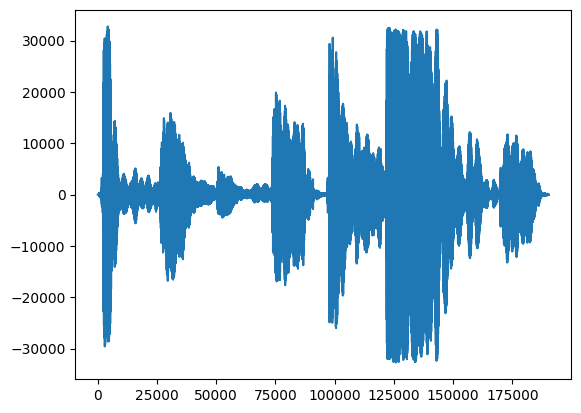

In [10]:
# We can visualize the audio as a waveform.
_ = plt.plot(audio_samples)

[频谱图](https://en.wikipedia.org/wiki/Spectrogram)更具参考性，可以显示随时间变化的频率。

我们在这里使用对数频率标度，使歌声更加清晰可见。


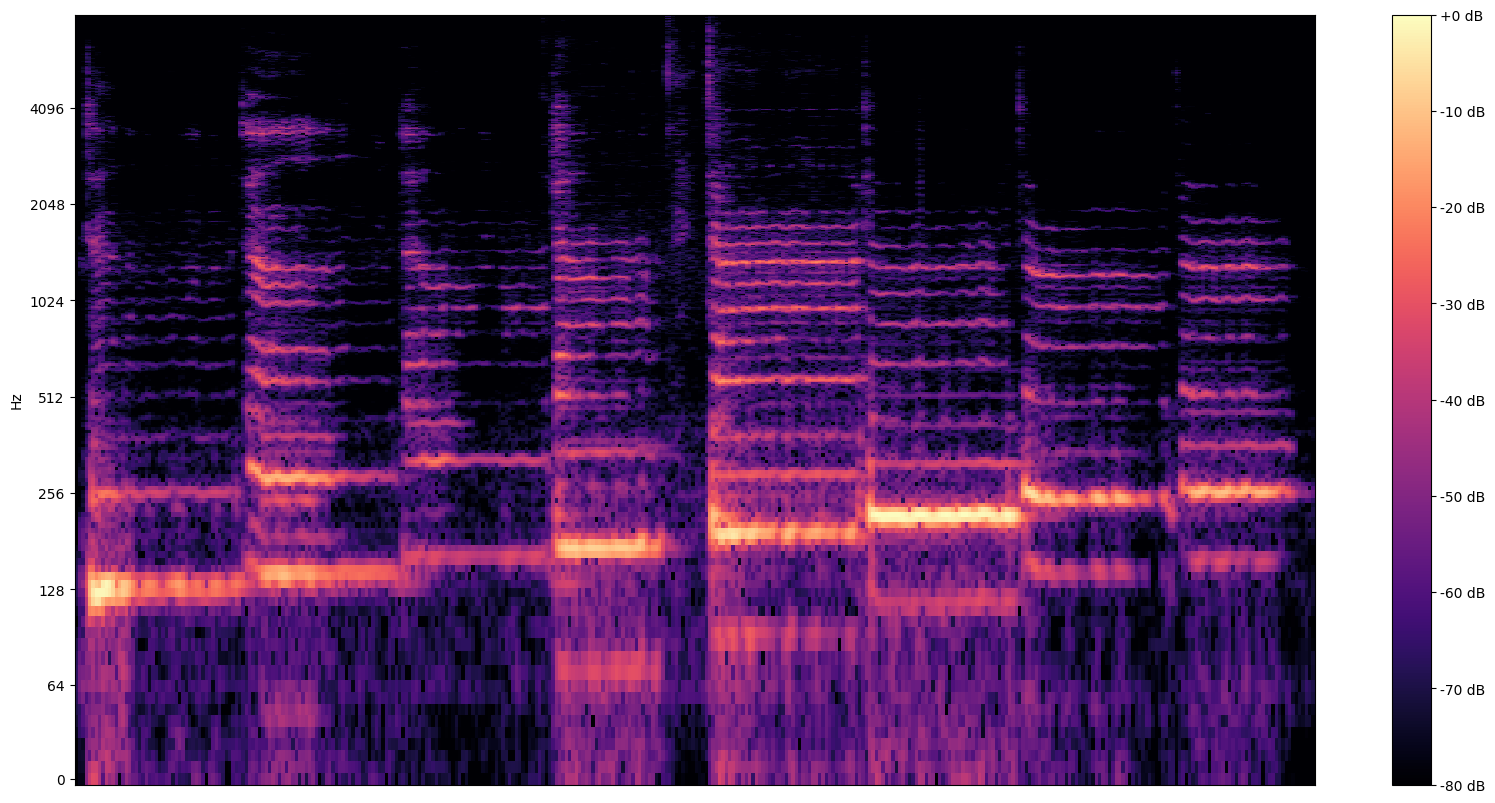

In [11]:
MAX_ABS_INT16 = 32768.0

def plot_stft(x, sample_rate, show_black_and_white=False):
  x_stft = np.abs(librosa.stft(x, n_fft=2048))
  fig, ax = plt.subplots()
  fig.set_size_inches(20, 10)
  x_stft_db = librosa.amplitude_to_db(x_stft, ref=np.max)
  if(show_black_and_white):
    librosadisplay.specshow(data=x_stft_db, y_axis='log', 
                             sr=sample_rate, cmap='gray_r')
  else:
    librosadisplay.specshow(data=x_stft_db, y_axis='log', sr=sample_rate)

  plt.colorbar(format='%+2.0f dB')

plot_stft(audio_samples / MAX_ABS_INT16 , sample_rate=EXPECTED_SAMPLE_RATE)
plt.show()


我们需要在这里进行最后的转换。音频样本为 int16 格式。需要将它们归一化为 -1 和 1 之间的浮点数。

In [12]:
audio_samples = audio_samples / float(MAX_ABS_INT16)

# 执行模型

接下来的部分比较容易，我们来使用 **TensorFlow Hub** 加载模型，并将音频馈送到模型中。SPICE 将为我们提供两个输出：音高和不确定性。


**TensorFlow Hub** 是一个库，用于发布、发现和使用机器学习模型的可重用部分。有了它，您就可以轻松利用机器学习来解决您的挑战。

要加载模型，您只需 Hub 模块和指向模型的网址：

In [13]:
# Loading the SPICE model is easy:
model = hub.load("https://tfhub.dev/google/spice/2")

**注：**这里有一个有趣的细节，Hub 上的所有模型网址均可用来下载和阅读文档，因此，如果将浏览器指向该链接，不仅可以阅读有关如何使用模型的文档，还可以详细了解模型的训练方式。

加载模型并准备好数据后，我们需要 3 行来得到结果： 

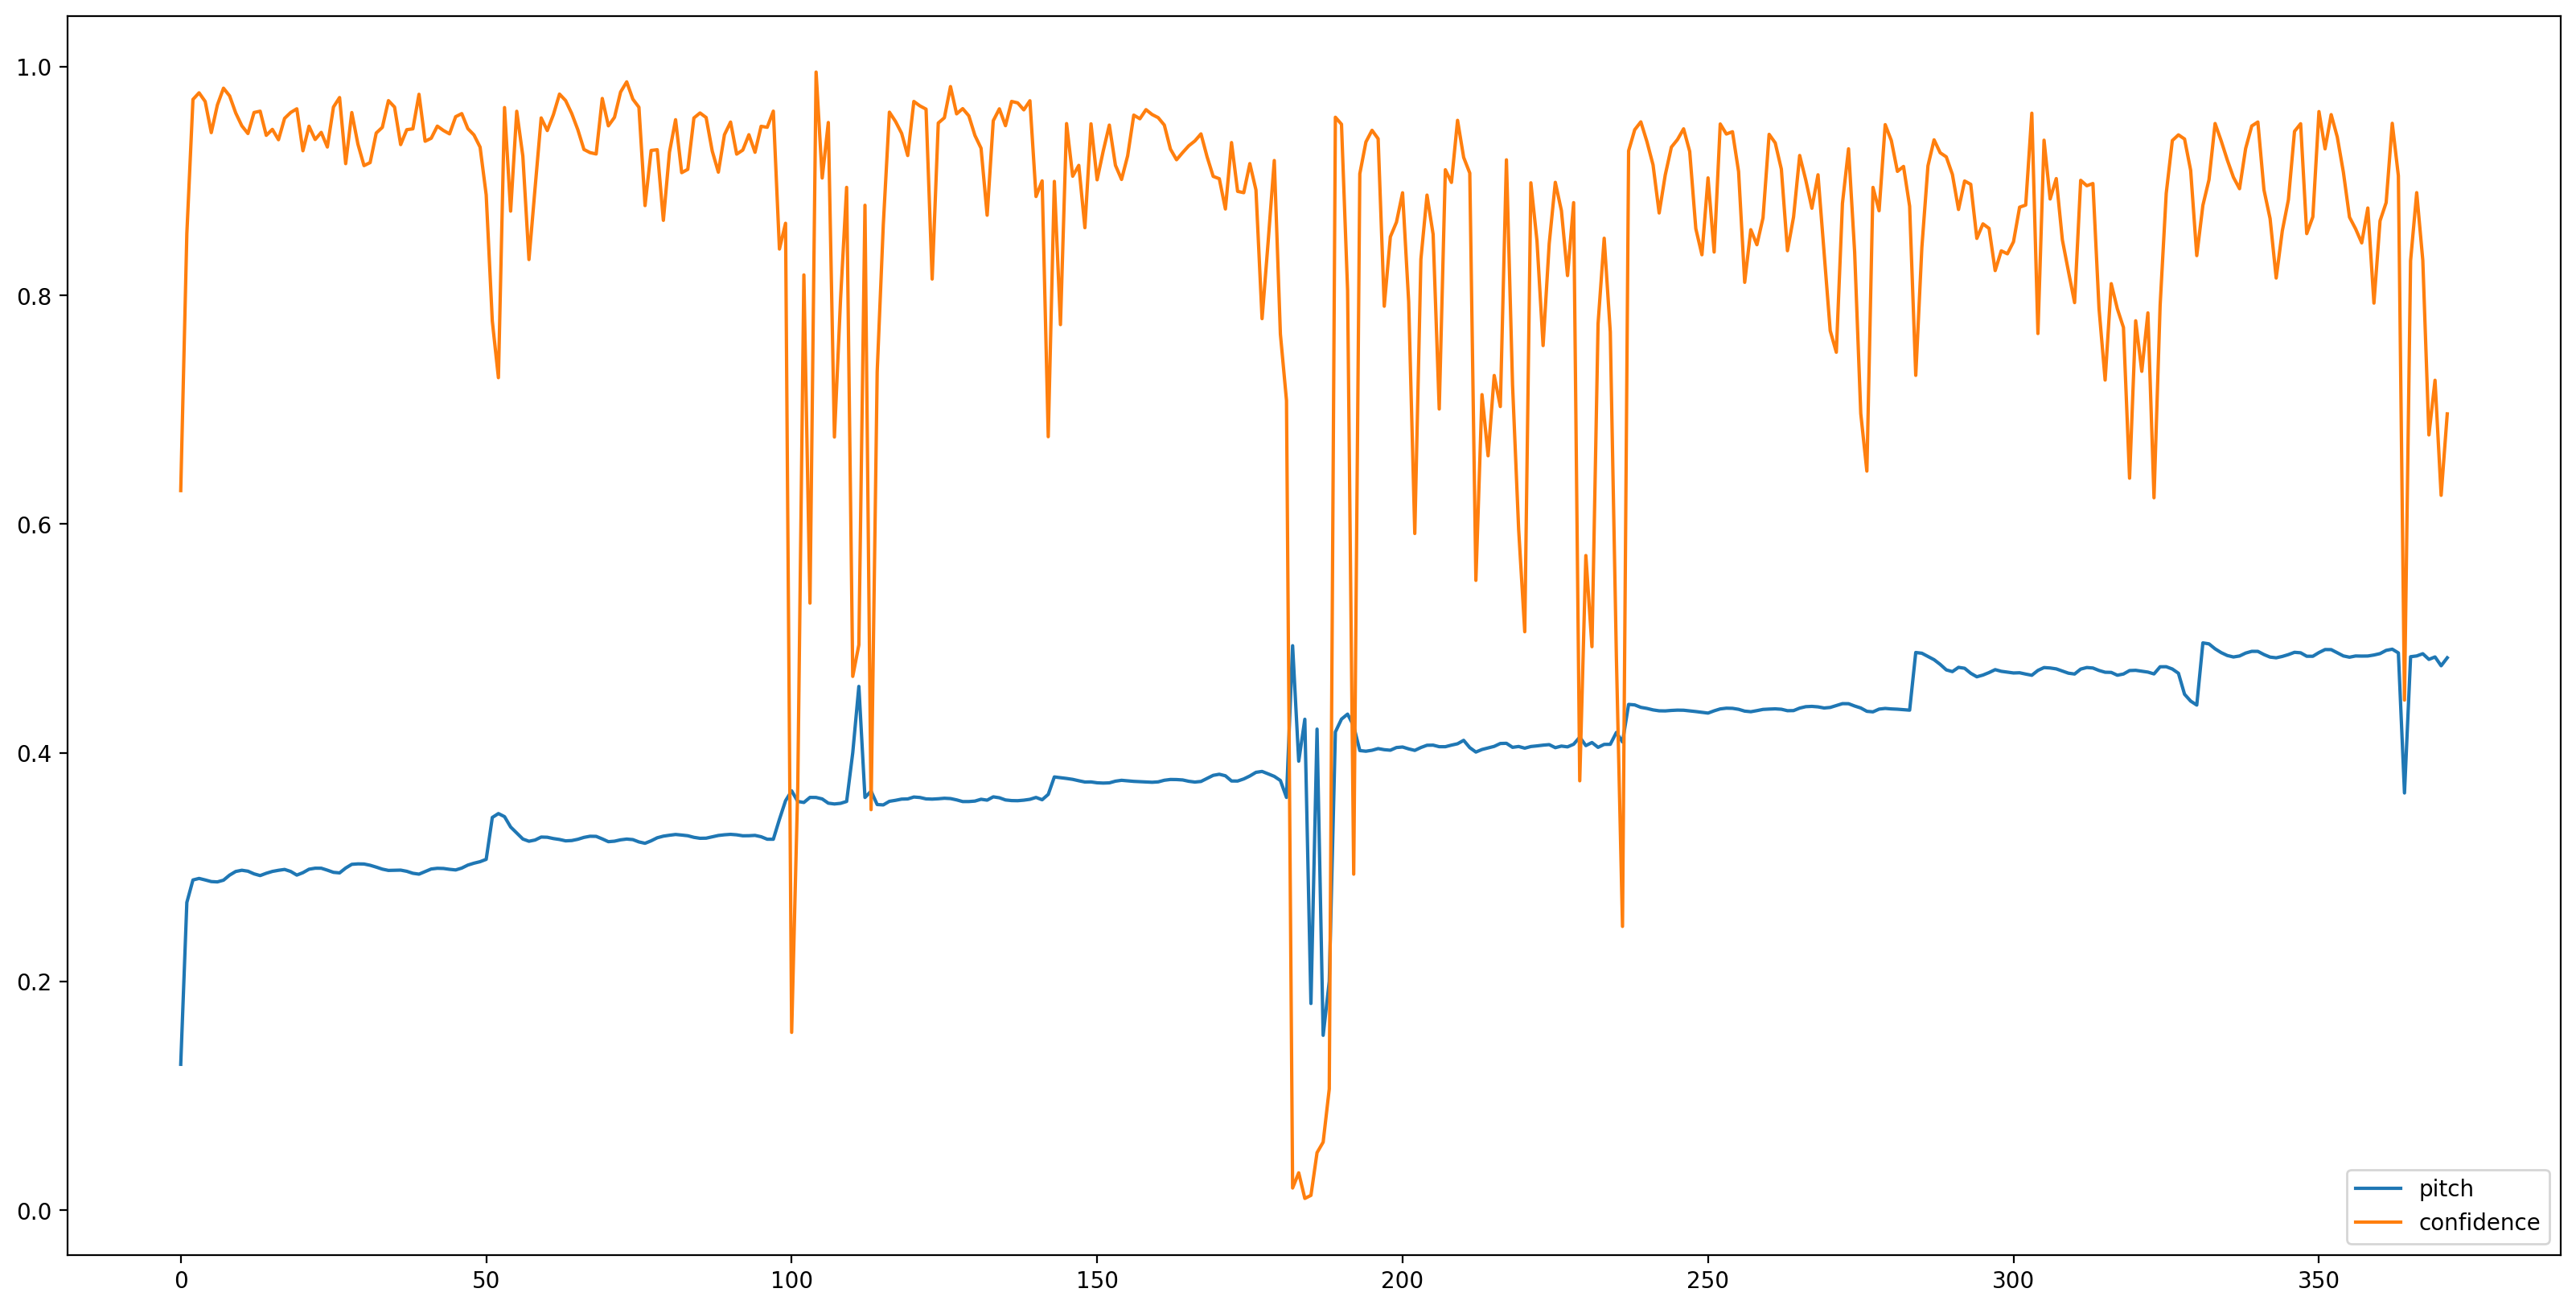

In [14]:
# We now feed the audio to the SPICE tf.hub model to obtain pitch and uncertainty outputs as tensors.
model_output = model.signatures["serving_default"](tf.constant(audio_samples, tf.float32))

pitch_outputs = model_output["pitch"]
uncertainty_outputs = model_output["uncertainty"]

# 'Uncertainty' basically means the inverse of confidence.
confidence_outputs = 1.0 - uncertainty_outputs

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
plt.plot(pitch_outputs, label='pitch')
plt.plot(confidence_outputs, label='confidence')
plt.legend(loc="lower right")
plt.show()

我们移除所有具有低置信度（置信度&lt;0.9）的音高估计值，并绘制剩余估计值，使结果更易于理解。


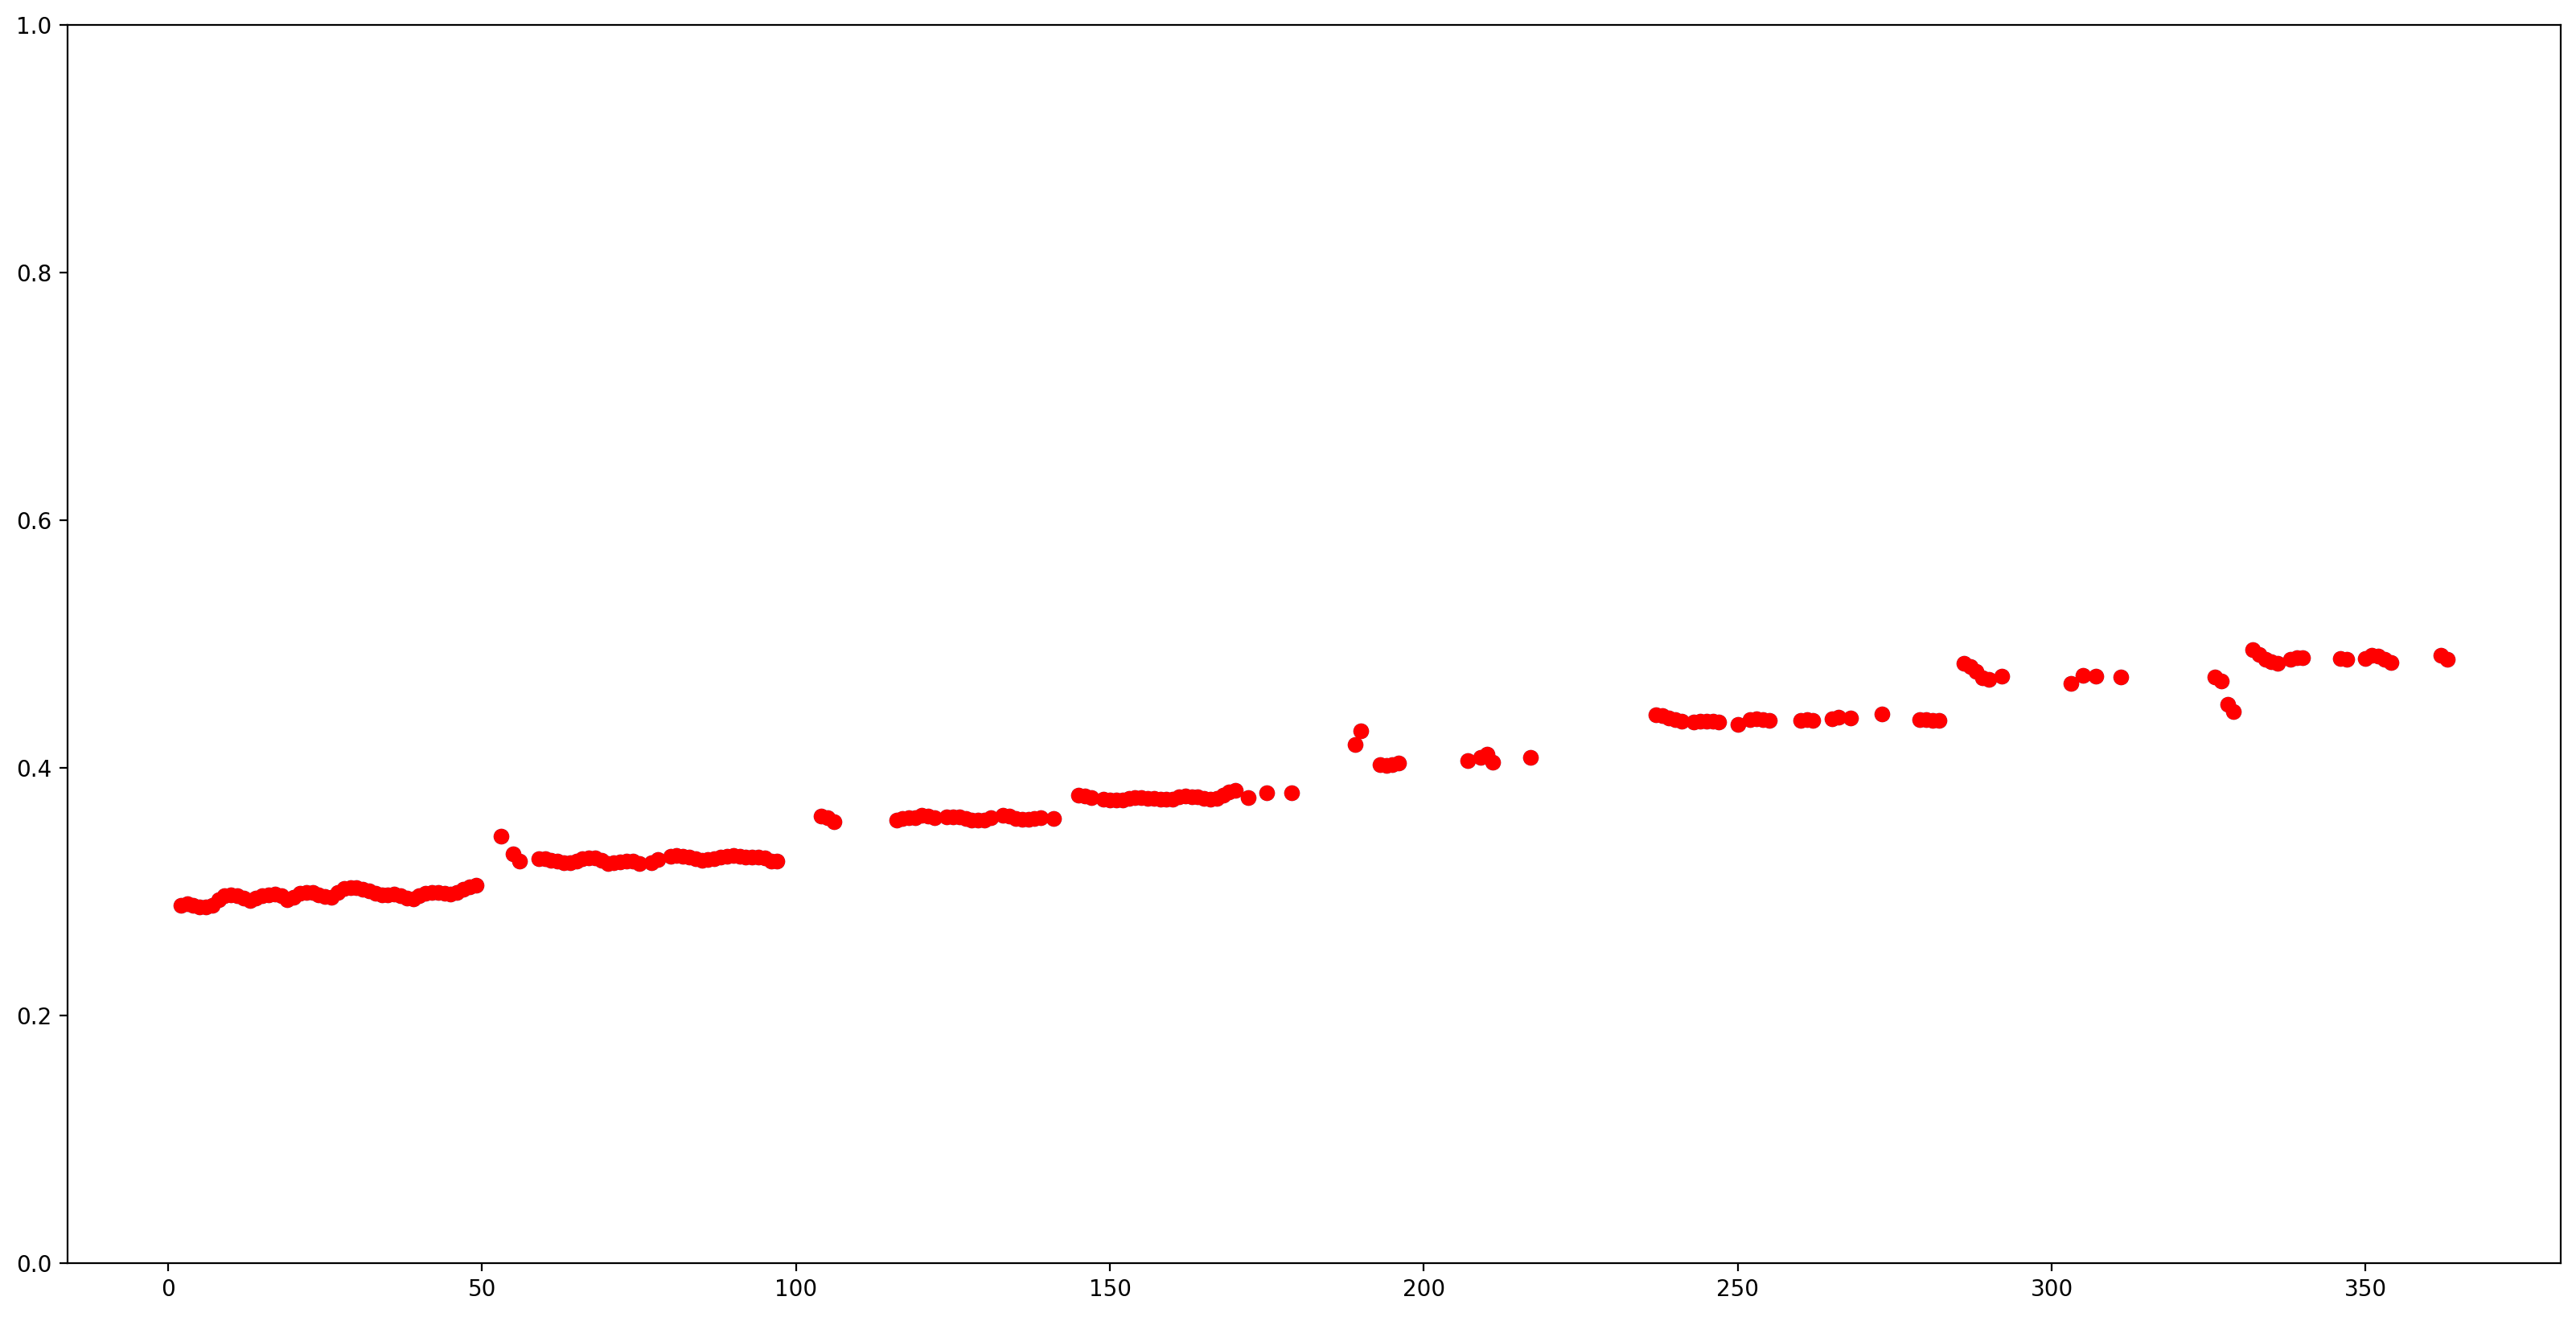

In [15]:
confidence_outputs = list(confidence_outputs)
pitch_outputs = [ float(x) for x in pitch_outputs]

indices = range(len (pitch_outputs))
confident_pitch_outputs = [ (i,p)  
  for i, p, c in zip(indices, pitch_outputs, confidence_outputs) if  c >= 0.9  ]
confident_pitch_outputs_x, confident_pitch_outputs_y = zip(*confident_pitch_outputs)
 
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax.set_ylim([0, 1])
plt.scatter(confident_pitch_outputs_x, confident_pitch_outputs_y, )
plt.scatter(confident_pitch_outputs_x, confident_pitch_outputs_y, c="r")

plt.show()

SPICE 返回的音高值在 0 到 1 之间。我们将其转换为以 Hz 为单位的绝对音高值。

In [16]:
def output2hz(pitch_output):
  # Constants taken from https://tfhub.dev/google/spice/2
  PT_OFFSET = 25.58
  PT_SLOPE = 63.07
  FMIN = 10.0;
  BINS_PER_OCTAVE = 12.0;
  cqt_bin = pitch_output * PT_SLOPE + PT_OFFSET;
  return FMIN * 2.0 ** (1.0 * cqt_bin / BINS_PER_OCTAVE)
    
confident_pitch_values_hz = [ output2hz(p) for p in confident_pitch_outputs_y ]

现在，我们来看看预测的效果如何：我们将预测的音高叠加在原始频谱图上。为了使音高预测值更加清晰可见，我们将频谱图更改为黑白配色。

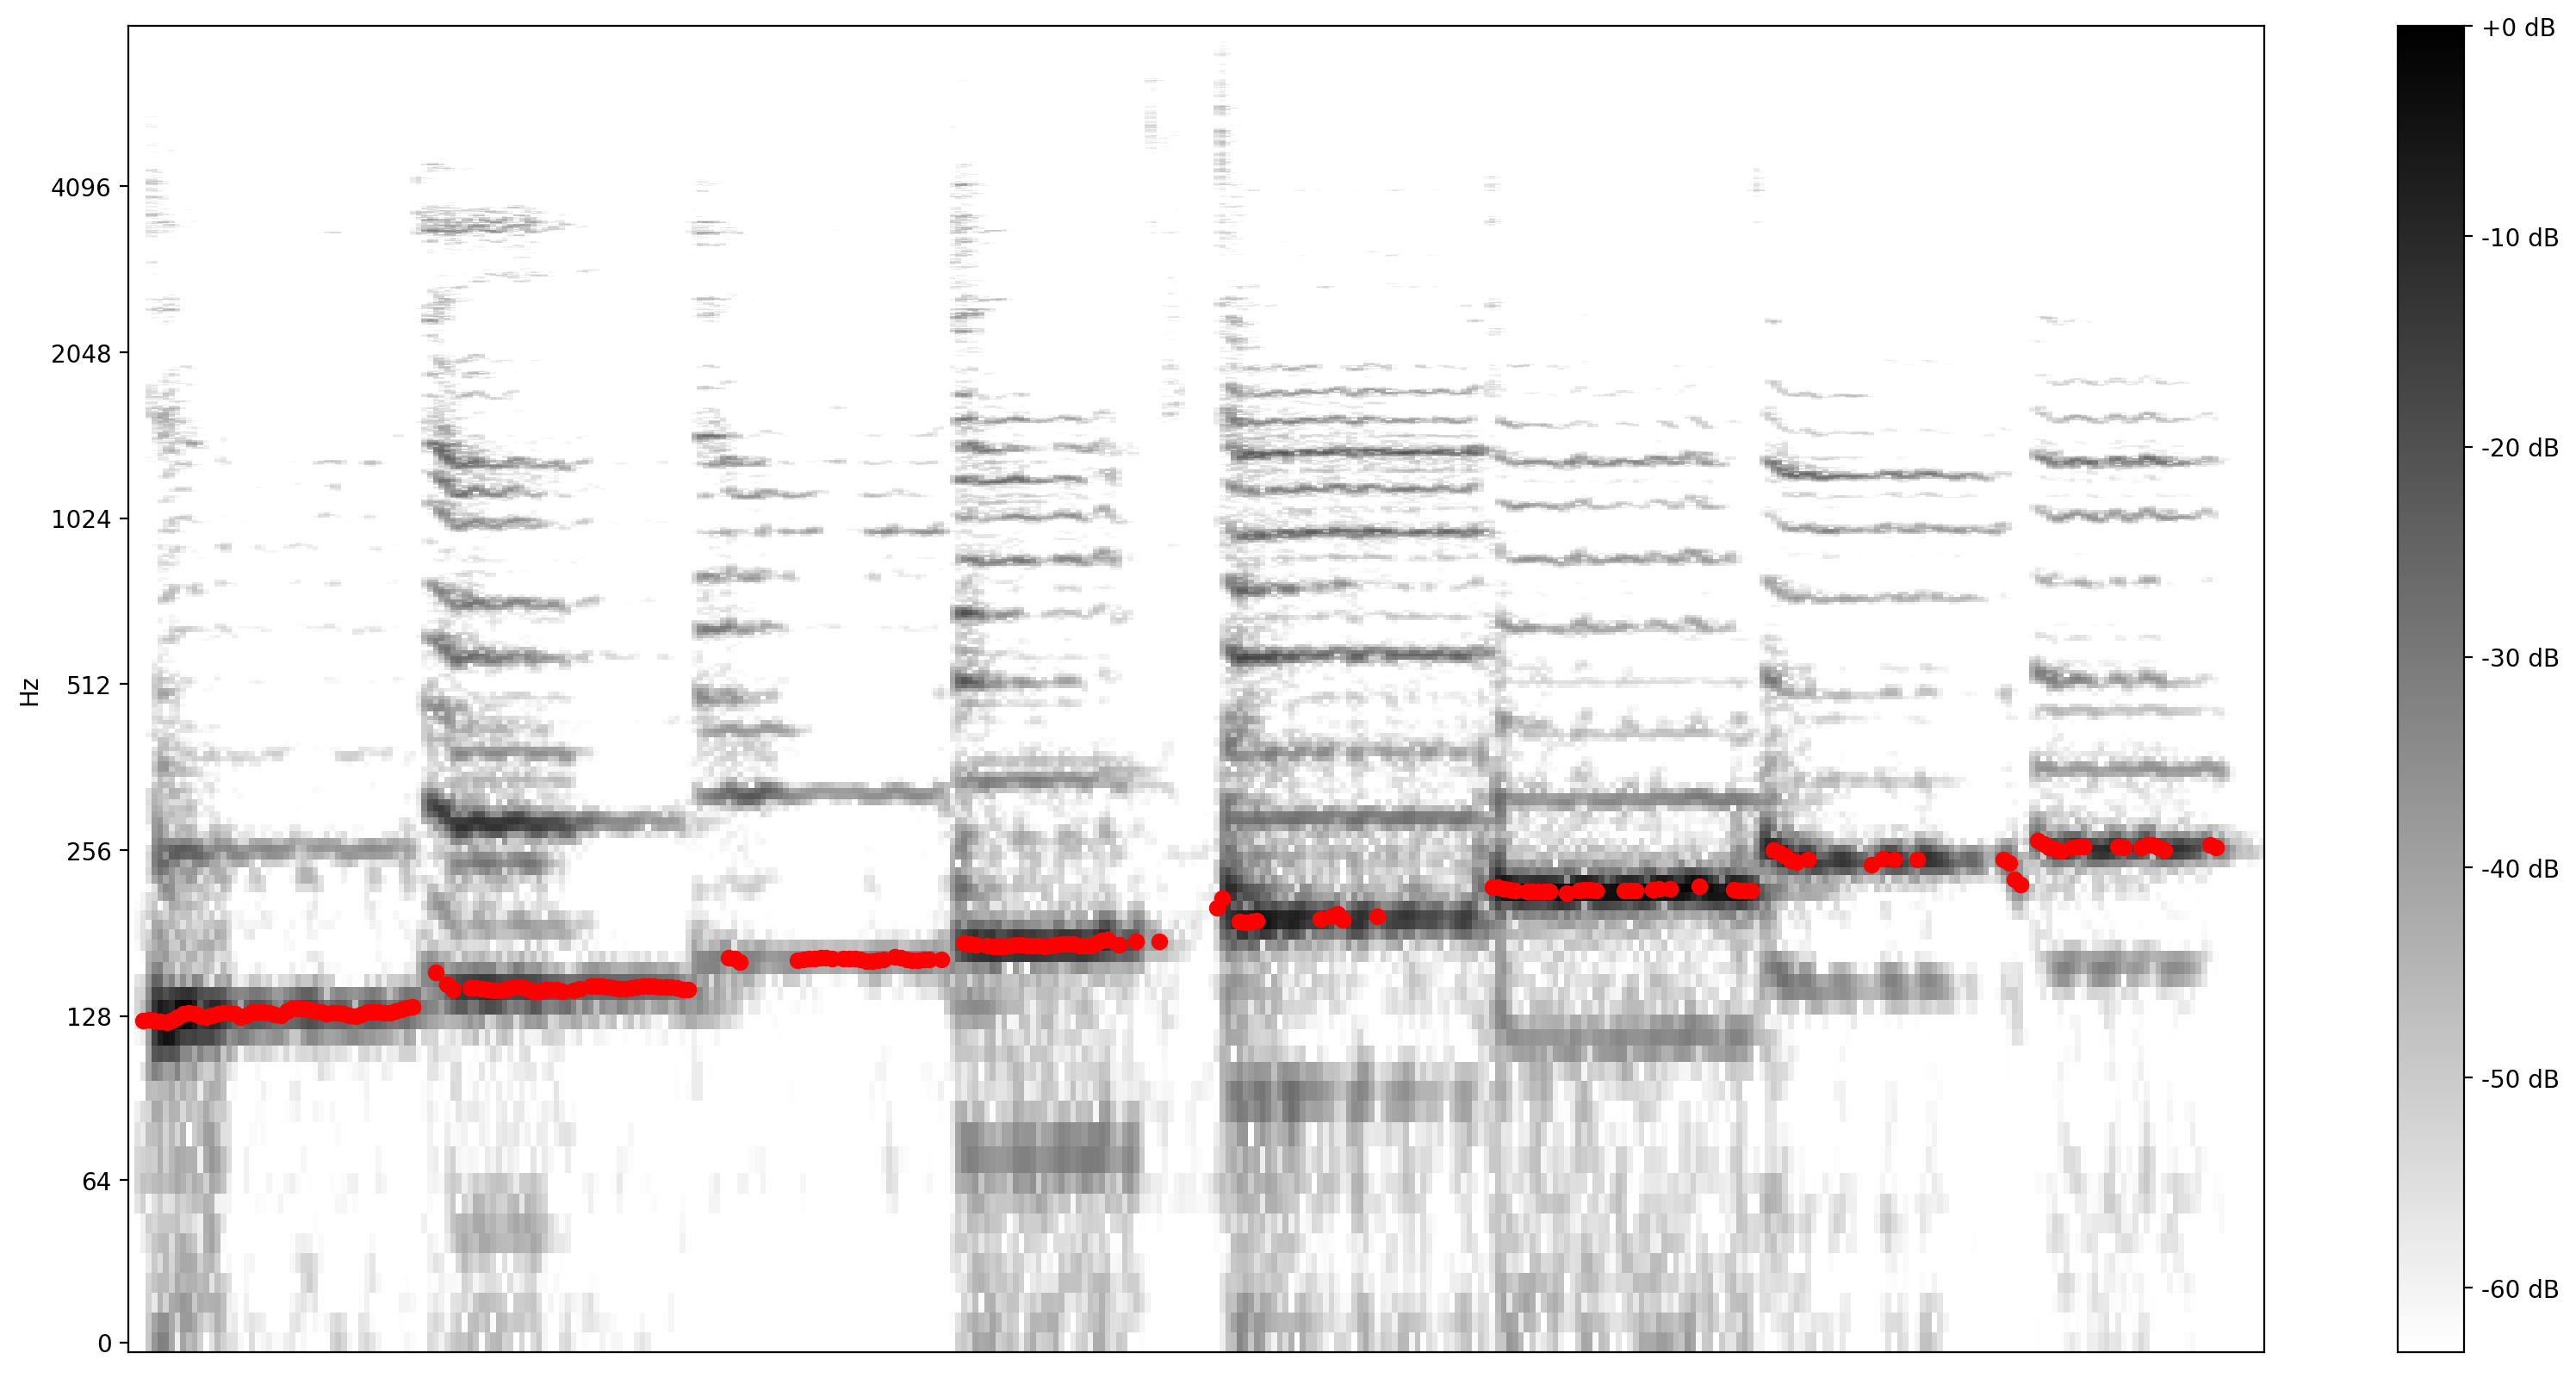

In [17]:
plot_stft(audio_samples / MAX_ABS_INT16 , 
          sample_rate=EXPECTED_SAMPLE_RATE, show_black_and_white=True)
# Note: conveniently, since the plot is in log scale, the pitch outputs 
# also get converted to the log scale automatically by matplotlib.
plt.scatter(confident_pitch_outputs_x, confident_pitch_values_hz, c="r")

plt.show()

# 转换为音符

现在有了音高值，我们来将它们转换为音符！这部分本身就是挑战。我们必须考虑以下两件事：

1. 剩余部分（没有歌声的部分）
2. 每个音符的大小（偏移量） 

### 1: 在输出中添加零来表示没有歌声的部分

In [18]:
pitch_outputs_and_rests = [
    output2hz(p) if c >= 0.9 else 0
    for i, p, c in zip(indices, pitch_outputs, confidence_outputs)
]

### 2: 添加音符偏移量

当一个人自由歌唱时，旋律可能会相对音符代表的绝对音高值发生偏移。因此，为了将预测值转换为音符，需要校正这种可能的偏移。这就是下面的代码所计算的内容。

In [19]:
A4 = 440
C0 = A4 * pow(2, -4.75)
note_names = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]

def hz2offset(freq):
  # This measures the quantization error for a single note.
  if freq == 0:  # Rests always have zero error.
    return None
  # Quantized note.
  h = round(12 * math.log2(freq / C0))
  return 12 * math.log2(freq / C0) - h


# The ideal offset is the mean quantization error for all the notes
# (excluding rests):
offsets = [hz2offset(p) for p in pitch_outputs_and_rests if p != 0]
print("offsets: ", offsets)

ideal_offset = statistics.mean(offsets)
print("ideal offset: ", ideal_offset)


offsets:  [0.2851056911175931, 0.3700368844097355, 0.2861639241998972, 0.19609005646164235, 0.17851549283916768, 0.2733467103665532, -0.4475316266590852, -0.24651809109990808, -0.1796576844031108, -0.23060136331860548, -0.37826153113190486, -0.4725081829601976, -0.3457194541269999, -0.2436666886383776, -0.1818906877810207, -0.1348077739650435, -0.24551812662426897, -0.4454903457934165, -0.3126792745167535, -0.12241723670307181, -0.06614479972665066, -0.06702634735648871, -0.1744116301709866, -0.29365739389006507, -0.32520890458170726, -0.0564402572685907, 0.1470525135224534, 0.17167006002122775, 0.16529058740790248, 0.09569531546290477, -0.006323616641203955, -0.11799822075907684, -0.18835098459069144, -0.17934754504506145, -0.17215607120338916, -0.23695828034226452, -0.34594501002376177, -0.39380233241860907, -0.2528674895936689, -0.11009436621014146, -0.07118973328416445, -0.08042436762396932, -0.12799598588293293, -0.16227296366040633, -0.05931985421721464, 0.1066761283701112, 0.210

现在，我们可以使用一些启发式方法尝试估计所演唱的最有可能的音符序列。上面计算出的理想偏移量只是其中一个因素，我们还需要知道速度（多少个预测值组成一个八分音符？），以及开始量化的时间偏移量。为简单起见，我们将尝试使用不同的速度和时间偏移量并测量量化误差，最后使用使该误差最小化的值。

In [20]:
def quantize_predictions(group, ideal_offset):
  # Group values are either 0, or a pitch in Hz.
  non_zero_values = [v for v in group if v != 0]
  zero_values_count = len(group) - len(non_zero_values)

  # Create a rest if 80% is silent, otherwise create a note.
  if zero_values_count > 0.8 * len(group):
    # Interpret as a rest. Count each dropped note as an error, weighted a bit
    # worse than a badly sung note (which would 'cost' 0.5).
    return 0.51 * len(non_zero_values), "Rest"
  else:
    # Interpret as note, estimating as mean of non-rest predictions.
    h = round(
        statistics.mean([
            12 * math.log2(freq / C0) - ideal_offset for freq in non_zero_values
        ]))
    octave = h // 12
    n = h % 12
    note = note_names[n] + str(octave)
    # Quantization error is the total difference from the quantized note.
    error = sum([
        abs(12 * math.log2(freq / C0) - ideal_offset - h)
        for freq in non_zero_values
    ])
    return error, note


def get_quantization_and_error(pitch_outputs_and_rests, predictions_per_eighth,
                               prediction_start_offset, ideal_offset):
  # Apply the start offset - we can just add the offset as rests.
  pitch_outputs_and_rests = [0] * prediction_start_offset + \
                            pitch_outputs_and_rests
  # Collect the predictions for each note (or rest).
  groups = [
      pitch_outputs_and_rests[i:i + predictions_per_eighth]
      for i in range(0, len(pitch_outputs_and_rests), predictions_per_eighth)
  ]

  quantization_error = 0

  notes_and_rests = []
  for group in groups:
    error, note_or_rest = quantize_predictions(group, ideal_offset)
    quantization_error += error
    notes_and_rests.append(note_or_rest)

  return quantization_error, notes_and_rests


best_error = float("inf")
best_notes_and_rests = None
best_predictions_per_note = None

for predictions_per_note in range(20, 65, 1):
  for prediction_start_offset in range(predictions_per_note):

    error, notes_and_rests = get_quantization_and_error(
        pitch_outputs_and_rests, predictions_per_note,
        prediction_start_offset, ideal_offset)

    if error < best_error:      
      best_error = error
      best_notes_and_rests = notes_and_rests
      best_predictions_per_note = predictions_per_note

# At this point, best_notes_and_rests contains the best quantization.
# Since we don't need to have rests at the beginning, let's remove these:
while best_notes_and_rests[0] == 'Rest':
  best_notes_and_rests = best_notes_and_rests[1:]
# Also remove silence at the end.
while best_notes_and_rests[-1] == 'Rest':
  best_notes_and_rests = best_notes_and_rests[:-1]

现在，我们将量化的音符编写成乐谱！

为此，我们将用到两个库：[music21](http://web.mit.edu/music21/) 和 [Open Sheet Music Display](https://github.com/opensheetmusicdisplay/opensheetmusicdisplay)

**注：**为简单起见，我们在此假设所有音符都具有相同的持续时间（二分音符）。

In [21]:
# Creating the sheet music score.
sc = music21.stream.Score()
# Adjust the speed to match the actual singing.
bpm = 60 * 60 / best_predictions_per_note
print ('bpm: ', bpm)
a = music21.tempo.MetronomeMark(number=bpm)
sc.insert(0,a)

for snote in best_notes_and_rests:   
    d = 'half'
    if snote == 'Rest':      
      sc.append(music21.note.Rest(type=d))
    else:
      sc.append(music21.note.Note(snote, type=d))

bpm:  78.26086956521739


In [22]:
#@title [Run this] Helper function to use Open Sheet Music Display (JS code) to show a music score

from IPython.core.display import display, HTML, Javascript
import json, random

def showScore(score):
    xml = open(score.write('musicxml')).read()
    showMusicXML(xml)
    
def showMusicXML(xml):
    DIV_ID = "OSMD_div"
    display(HTML('<div id="'+DIV_ID+'">loading OpenSheetMusicDisplay</div>'))
    script = """
    var div_id = %%DIV_ID%%;
    function loadOSMD() { 
        return new Promise(function(resolve, reject){
            if (window.opensheetmusicdisplay) {
                return resolve(window.opensheetmusicdisplay)
            }
            // OSMD script has a 'define' call which conflicts with requirejs
            var _define = window.define // save the define object 
            window.define = undefined // now the loaded script will ignore requirejs
            var s = document.createElement( 'script' );
            s.setAttribute( 'src', "https://cdn.jsdelivr.net/npm/opensheetmusicdisplay@0.7.6/build/opensheetmusicdisplay.min.js" );
            //s.setAttribute( 'src', "/custom/opensheetmusicdisplay.js" );
            s.onload=function(){
                window.define = _define
                resolve(opensheetmusicdisplay);
            };
            document.body.appendChild( s ); // browser will try to load the new script tag
        }) 
    }
    loadOSMD().then((OSMD)=>{
        window.openSheetMusicDisplay = new OSMD.OpenSheetMusicDisplay(div_id, {
          drawingParameters: "compacttight"
        });
        openSheetMusicDisplay
            .load(%%data%%)
            .then(
              function() {
                openSheetMusicDisplay.render();
              }
            );
    })
    """.replace('%%DIV_ID%%',DIV_ID).replace('%%data%%',json.dumps(xml))
    display(Javascript(script))
    return

/tmpfs/tmp/ipykernel_80370/2305315633.py:3: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML, Javascript


In [23]:
# rendering the music score
showScore(sc)
print(best_notes_and_rests)

/tmpfs/src/tf_docs_env/lib/python3.9/site-packages/music21/musicxml/m21ToXml.py:510: MusicXMLWarning: <music21.stream.Score 0x7fc458415940> is not well-formed; see isWellFormedNotation()
  warnings.warn(f'{scOut} is not well-formed; see isWellFormedNotation()',


<IPython.core.display.Javascript object>

['C3', 'D3', 'E3', 'F3', 'G3', 'A3', 'B3', 'C4']


我们将音符转换为 MIDI 文件听听看。

要创建此文件，我们可以使用之前创建的流。

In [24]:
# Saving the recognized musical notes as a MIDI file
converted_audio_file_as_midi = converted_audio_file[:-4] + '.mid'
fp = sc.write('midi', fp=converted_audio_file_as_midi)

In [25]:
wav_from_created_midi = converted_audio_file_as_midi.replace(' ', '_') + "_midioutput.wav"
print(wav_from_created_midi)

converted_audio_file.mid_midioutput.wav


要在 Colab 上收听，我们需要将其转换回 WAV。一种简单的方法是使用 Timidity。

In [26]:
!timidity $converted_audio_file_as_midi -Ow -o $wav_from_created_midi

Playing converted_audio_file.mid
MIDI file: converted_audio_file.mid
Format: 1  Tracks: 2  Divisions: 1024
Track name: 


Playing time: ~16 seconds
Notes cut: 0
Notes lost totally: 0


最后，听一下由音符创建的音频，该音频由模型推理，根据预测的音高通过 MIDI 创建！


In [27]:
Audio(wav_from_created_midi)